# Coins and dice

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the free [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>. 

---

In this notebook, we illustrate NumPy features for working with discrete probability distributions, such as those resulting from a coin toss or a dice roll. For an introduction to NumPy arrays, see the [NumPy tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial). We also show how to use the [SymPy symbolic mathematics library](https://sympy.org/) to analyze dice problems analytically. The notebook uses Python 3. 

In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats=['svg']
numpy.set_printoptions(threshold=20)

Let’s **simulate a coin toss** by a random choice between the numbers 0 and 1 (say 0 represents tails and 1 represents heads). Note that the second argument to `randint` is an *exclusive* upper bound.

In [2]:
numpy.random.randint(0, 2)

1

Let’s toss two coins, which gives as an array with the result of the first and second toss.

In [3]:
numpy.random.randint(0, 2, 2)

array([0, 1])

The number of heads when tossing a coin twice is simply the sum of that array.

In [4]:
numpy.random.randint(0, 2, 2).sum()

0

**Task**: simulate *number of heads when tossing a coin twice*. Do this 1000 times, calculate the expected value of the number of heads, and plot the distribution of results (the Probability Mass Function).

In [5]:
N = 1000
heads = numpy.zeros(N, dtype=int)
for i in range(N):
    heads[i] = numpy.random.randint(0, 2, 2).sum()
heads

array([1, 1, 1, ..., 1, 1, 1])

The **expected value** (or mathematical expectation) of the number of heads is simply the mean of our observations (it’s what happens “on average”). 

In [6]:
heads.mean()

1.003

Now let’s look at the **distribution** of the number of heads obtained. Let’s count how many times we have scored 0, 1 or 2 in our 1000 simulations, using the `bincount` function from `numpy`. 

In [7]:
numpy.bincount(heads)

array([244, 509, 247])

Let’s plot that Probability Mass Function.

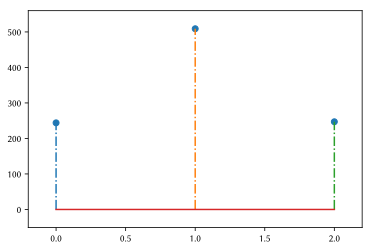

In [8]:
plt.stem(numpy.bincount(heads), '-.')
plt.margins(0.1)

The SymPy library, which adds symbolic mathematics capabilities to Python, has functionality that allows us to calculate the expected number of heads and the probability distribution **analytically**.

In [9]:
import sympy.stats

toss1 = sympy.stats.Bernoulli("toss1", p=0.5)
toss2 = sympy.stats.Bernoulli("toss2", p=0.5)
sympy.stats.E(toss1 + toss2)

1.00000000000000

So the **expected value** of the number of heads is 1 (the numerical approximation we estimated using our simulation above was very close to that). Now let's examine the **probability distribution**. 

In [10]:
sympy.stats.density(toss1 + toss2)

{0: 0.250000000000000, 1: 0.500000000000000, 2: 0.250000000000000}

## Expected value of a dice roll

The expected value of a dice roll is 

$$\sum_{i=1}^6 i \times \frac{1}{6} = 3.5$$

That means that if we toss a dice a large number of times, the mean value should converge to 3.5. Let's check that by running a simulation in Python.

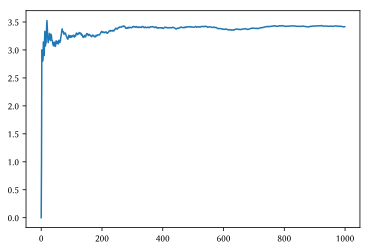

In [11]:
N = 1000
roll = numpy.zeros(N, dtype=int)
expectation = numpy.zeros(N)
for i in range(N):
    roll[i] = numpy.random.randint(1, 7)
for i in range(1, N):
    expectation[i] = numpy.mean(roll[0:i])
plt.plot(expectation);

The sympy.stats module has functionality that allows us to evaluate the expected value analytically. 

In [12]:
D = sympy.stats.Die('D', 6)
sympy.stats.E(D)

7/2

## Simulating dice throws

In [13]:
dice = scipy.stats.randint(1, 7)
dice.rvs(1000).max()

6

We simulated a thousand dice throws, and never rolled anything bigger than a 6 (that’s reassuring!).

What is the probability of a die rolling 4?

In [14]:
dice.pmf(4)

0.16666666666666666

What is the probability of rolling 4 or below?

In [15]:
dice.cdf(4)

0.6666666666666666

What is the probability of rolling between 2 and 4 (inclusive)?

In [16]:
dice.cdf(4) - dice.cdf(1)

0.5

Again, using `sympy.stats` to calculate this analytically:

The probability of a dice roll of 4:

In [17]:
sympy.stats.P(sympy.Eq(D, 4))

1/6

Probability of rolling 4 or below:

In [18]:
sympy.stats.P(D <= 4)

2/3

Probability of rolling between 2 and 4 (inclusive):

In [19]:
sympy.stats.P(sympy.And(D >= 2, D <= 4))

1/2

Now let’s look at what happens when we roll **three dice**. We’ll estimate the expected value and the probability mass function for the sum of three dice.  

In [20]:
N = 10000
roll = numpy.zeros(N, dtype=int)
for i in range(N):
    roll[i] = scipy.stats.randint(1, 7).rvs(3).sum()
roll.mean()

10.4616

We can plot the probability mass function for the sum of three dice:

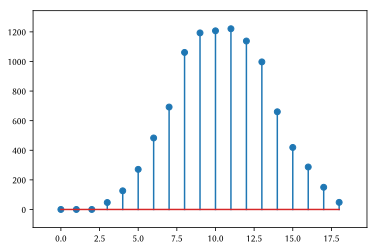

In [21]:
plt.stem(numpy.bincount(roll))
plt.margins(0.1)

The SymPy library allows us to calculate the expectation and probability distribution **analytically**. 

In [22]:
D1 = sympy.stats.Die('D1', 6)
D2 = sympy.stats.Die('D2', 6)
D3 = sympy.stats.Die('D3', 6)
Z = D1 + D2 + D3
sympy.stats.E(Z)

21/2

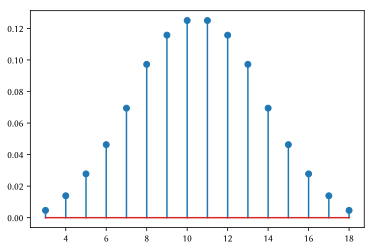

In [23]:
pmf = sympy.stats.density(Z)
keys = pmf.keys()
plt.stem(list(keys), [pmf[k] for k in keys]);

The SymPy library also allows us to calculate more complicated expressions, such as the probability that the sum of three dice is greater than 10, given that the first throw is bigger than 4. This is called a *conditional probability*.

In [24]:
sympy.stats.P(D1 + D2 + D3 > 10, D1 > 4)

7/9

We can estimate the same value using Python:

In [25]:
N = 1000
count = 0
hits = 0
while count < N:
    roll = scipy.stats.randint(1, 7).rvs(3)
    if roll[0] > 4:
        count += 1
        if roll.sum() > 10:
            hits += 1
hits / float(count)

0.794

## The gambles of the Chevalier de Méré

Let’s analyze two problems which were discussed between Antoine Gombaud, chevalier de Méré, a passionate gambler, and the mathematician Blaise Pascal. This discussion helped in the development of probability theory.

The **first problem**: *is it a good idea to gamble on the appearance of at least one 6 when a dice is thrown 4 times*?

The probability of losing this gamble is easy to calculate analytically: each throw has 5 chances out of 6 of not seeing a 6, and the events are independent. So the probability of winning is

In [26]:
1 - (5/6.0)**4

0.5177469135802468

The probability of winning is greater than 0.5. We can also check this problem with SymPy:

In [27]:
import sympy.stats

D1 = sympy.stats.Die('D1', 6)
D2 = sympy.stats.Die('D2', 6)
D3 = sympy.stats.Die('D3', 6)
D4 = sympy.stats.Die('D4', 6)

sympy.stats.P(sympy.Or(D1 > 5, sympy.Or(D2 > 5, sympy.Or(D3 > 5, D4 > 5)))) + 0.0

0.517746913580247

The **second problem**: *is it a good idea to gamble on the appearance of at least one double six when two dice are thrown 24 times*? 

The probability of losing this gamble is also easy to calculate: there are 35 chances out of 36 (6 * 6) of not seeing a double 6 on each double throw, so the probability of winning is

In [28]:
1 - (35/36.0)**24

0.4914038761309034

So this is not a good gamble. We can also calculate this analytically with SymPy, by modelling a Binomial random variable:

In [29]:
A = sympy.stats.Die('A', 6)
B = sympy.stats.Die('B', 6)
doublesix = sympy.stats.Binomial('DoubleSix', 24, sympy.stats.P(sympy.And(A > 5, B > 5)))
sympy.stats.P(doublesix >= 1) + 0.0

0.491403876130903

**Exercise**: write some Python code to simulate this gamble and check that you obtain a similar probability. 

## Pepys and Newton

Samuel Pepys was a great diarist of the English language and a friend of Isaac Newton’s. Pepys was a gambler and [wrote to Newton](https://en.wikipedia.org/wiki/Newton%E2%80%93Pepys_problem) to ask which of three events is the most likely

1. at least one six comes up when six fair dice are rolled;
2. at least two sixes come up when 12 dice are rolled;
3. at least three sixes come up when 18 dice are rolled.

**Possibility 1**: probability of at least one six is 1 minus the probability of zero sixes, which is

In [30]:
1 - (5/6.0)**6

0.6651020233196159

**Possibility 2**. probability of at lest two sixes is 1 minus the probability of zero sixes, minus the probability of one six. The probability of zero sixes is easy to calculate; here are three ways of calculating it.

In [31]:
# throw a non-6 12 times
(5/6.0)**12

0.11215665478461515

In [32]:
# probability mass at 0 of a binomial distribution with n=18, p=1/6
scipy.stats.binom(12, 1/6.0).pmf(0)

0.11215665478461512

In [33]:
# a symbolic representation of the same binomial distribution as above
D12 = sympy.stats.Binomial('18dice', 12, 1/6)
sympy.stats.P(sympy.Eq(D12, 0))

0.112156654784615

The probability of one six can likewise be determined using the binomial distribution.

In [34]:
scipy.stats.binom(12, 1/6.0).pmf(1)

0.26917597148307565

so the final answer is

In [35]:
roll12 = scipy.stats.binom(12, 1/6.0)
1 - roll12.pmf(0) - roll12.pmf(1)

0.6186673737323092

**Possibility 3**: in the same way, it's one minus the probability of zero sixes, minus the probability of one six, minus the probability of two sixes.

In [36]:
roll18 = scipy.stats.binom(18, 1/6.0)
1 - roll18.pmf(0) - roll18.pmf(1) - roll18.pmf(2)

0.597345685947724

In [37]:
1 - roll18.cdf(2)

0.5973456859477233

Conclusion: it's best to bet on possibility 1.